## 1. Import librairies

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import eda_helper_functions
import missingno as msno
from sklearn.ensemble import IsolationForest

## 2. Read the Training Data

In [4]:
file_path = r"/Users/sudhirjoon/Library/Mobile Documents/com~apple~CloudDocs/Uni_Mannheim/Nitish/Project_1_Flight_price_prediction/Data/train.csv"
train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-12,Delhi,Cochin,20:55:00,19:00:00,1325,1.0,In-flight meal not included,10262
1,Jet Airways,2019-05-27,Banglore,Delhi,15:15:00,18:10:00,175,0.0,In-flight meal not included,3502
2,Jet Airways,2019-04-01,Kolkata,Banglore,20:25:00,18:00:00,1295,1.0,No Info,11467
3,Jet Airways,2019-04-01,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,10953
4,Spicejet,2019-04-01,Banglore,Delhi,05:55:00,08:35:00,160,0.0,No check-in baggage included,3919
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-04-24,Banglore,Delhi,13:20:00,16:10:00,170,0.0,No Info,6121
636,Indigo,2019-04-01,Mumbai,Hyderabad,09:10:00,10:40:00,90,0.0,No Info,3342
637,Indigo,2019-06-27,Chennai,Kolkata,14:45:00,17:05:00,140,0.0,No Info,3597
638,Indigo,2019-03-06,Mumbai,Hyderabad,02:30:00,04:00:00,90,0.0,No Info,3175


In [5]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
train.total_stops.unique()

array([1., 0., 2., 3.])

In [7]:
train.total_stops.isna().sum()

0

In [8]:
train = train.assign(**{
    col : pd.to_datetime(train.loc[:, col],dayfirst= True, format= "mixed")
    for col in ["date_of_journey","dep_time", "arrival_time"]
})
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-12,Delhi,Cochin,2024-05-31 20:55:00,2024-05-31 19:00:00,1325,1.0,In-flight meal not included,10262
1,Jet Airways,2019-05-27,Banglore,Delhi,2024-05-31 15:15:00,2024-05-31 18:10:00,175,0.0,In-flight meal not included,3502
2,Jet Airways,2019-04-01,Kolkata,Banglore,2024-05-31 20:25:00,2024-05-31 18:00:00,1295,1.0,No Info,11467
3,Jet Airways,2019-04-01,Kolkata,Banglore,2024-05-31 09:35:00,2024-05-31 21:05:00,690,1.0,No Info,10953
4,Spicejet,2019-04-01,Banglore,Delhi,2024-05-31 05:55:00,2024-05-31 08:35:00,160,0.0,No check-in baggage included,3919
...,...,...,...,...,...,...,...,...,...,...
635,Air India,2019-04-24,Banglore,Delhi,2024-05-31 13:20:00,2024-05-31 16:10:00,170,0.0,No Info,6121
636,Indigo,2019-04-01,Mumbai,Hyderabad,2024-05-31 09:10:00,2024-05-31 10:40:00,90,0.0,No Info,3342
637,Indigo,2019-06-27,Chennai,Kolkata,2024-05-31 14:45:00,2024-05-31 17:05:00,140,0.0,No Info,3597
638,Indigo,2019-03-06,Mumbai,Hyderabad,2024-05-31 02:30:00,2024-05-31 04:00:00,90,0.0,No Info,3175


In [9]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## 3. High level summary of data

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [11]:
train.describe(include= "number")

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,659.664062,0.823438,9180.551563
std,506.584427,0.641605,4264.846453
min,75.000000,0.000000,1965.000000
25%,175.000000,0.000000,5677.000000
50%,535.000000,1.000000,8736.500000
75%,996.250000,1.000000,12395.000000
max,2300.000000,3.000000,27992.000000


In [12]:
(
    train
    .assign(total_stops = train["total_stops"].astype(object))
    .describe(include= "O")
)

,airline,source,destination,total_stops,additional_info
count,640,640,640,640.0,640
unique,9,5,6,4.0,3
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,249,269,269,366.0,487


- **Observations**

## 4. High-level analysis missing values

In [13]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


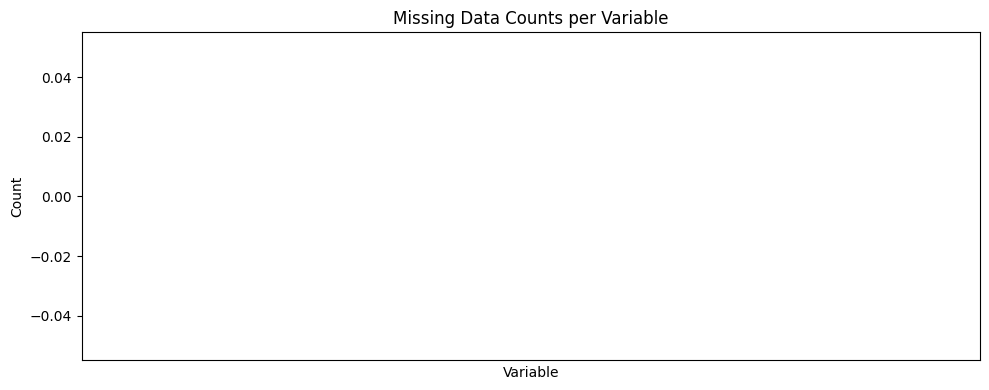

In [14]:
eda_helper_functions.plot_missing_info(train)

## 5. High Level Analysis of Outliers

In [15]:
forest = IsolationForest(random_state= 42, n_estimators= 100)

In [16]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = "price")
                                         .select_dtypes(include="number")))
    .query("outlier == -1")                                                     #-1 are outliers
    # .duration
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
7,Jet Airways,2019-03-24,Mumbai,Hyderabad,2024-05-31 15:50:00,2024-05-31 17:20:00,90,0.0,No Info,5678,-1
8,Jet Airways,2019-06-01,Delhi,Cochin,2024-05-31 22:50:00,2024-05-31 19:00:00,1210,1.0,No Info,14714,-1
9,Indigo,2019-05-15,Delhi,Cochin,2024-05-31 14:25:00,2024-05-31 17:40:00,195,0.0,No Info,6541,-1
13,Jet Airways,2019-06-03,Delhi,Cochin,2024-05-31 11:40:00,2024-05-31 19:00:00,440,2.0,In-flight meal not included,15812,-1
15,Indigo,2019-04-27,Delhi,Cochin,2024-05-31 14:20:00,2024-05-31 17:35:00,195,0.0,No Info,5021,-1
...,...,...,...,...,...,...,...,...,...,...,...
630,Air India,2019-05-12,Kolkata,Banglore,2024-05-31 12:00:00,2024-05-31 07:55:00,1195,2.0,No Info,10676,-1
633,Jet Airways,2019-05-09,Kolkata,Banglore,2024-05-31 08:25:00,2024-05-31 12:00:00,1655,1.0,In-flight meal not included,9663,-1
634,Air India,2019-05-06,Kolkata,Banglore,2024-05-31 10:00:00,2024-05-31 10:00:00,1440,2.0,No Info,14298,-1
636,Indigo,2019-04-01,Mumbai,Hyderabad,2024-05-31 09:10:00,2024-05-31 10:40:00,90,0.0,No Info,3342,-1


## 6. Pair Plots

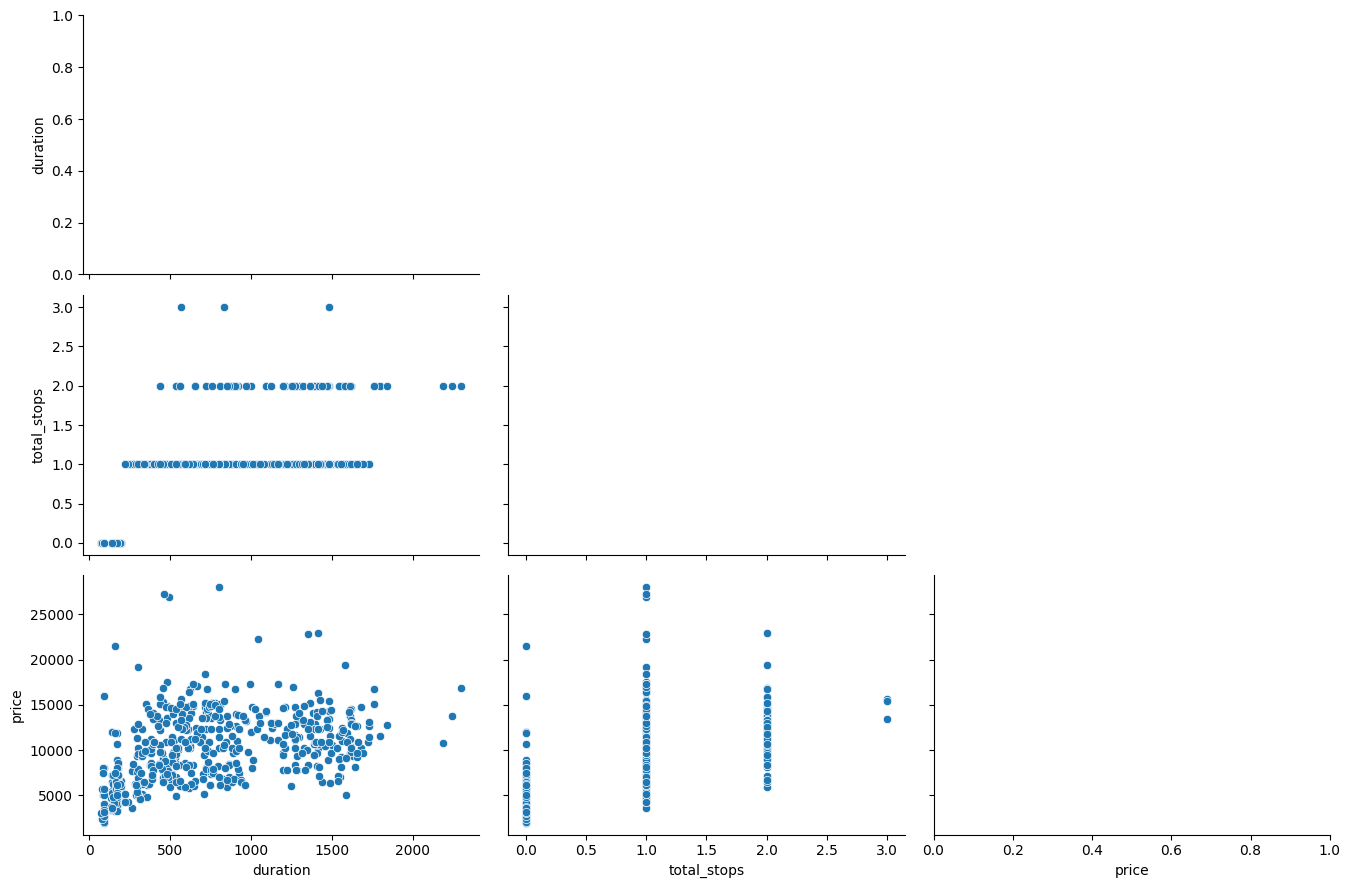

In [17]:
eda_helper_functions.pair_plots(train)

## 7. Correlation Analysis

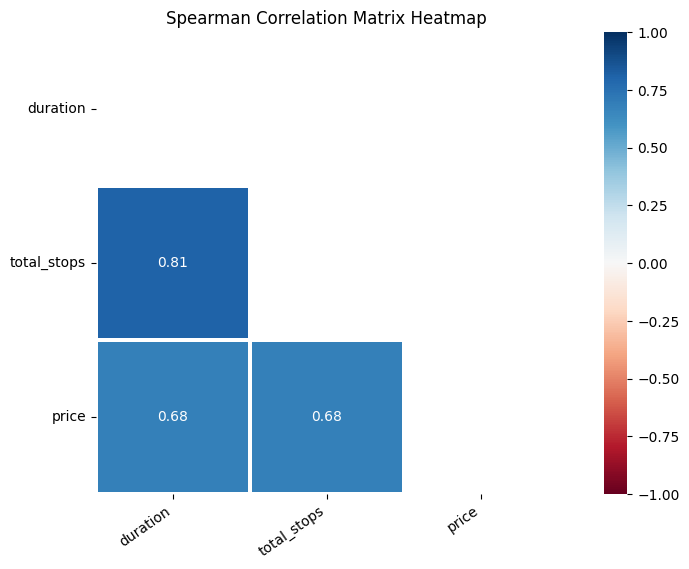

In [18]:
eda_helper_functions.correlation_heatmap(train)

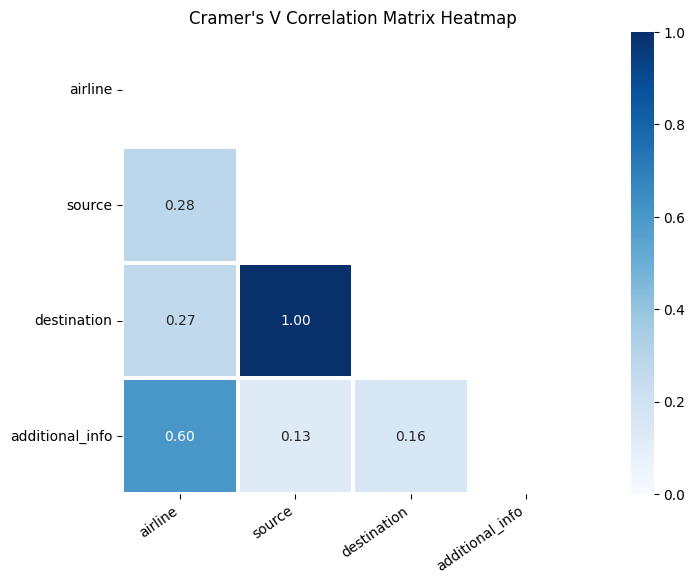

In [19]:
# for categorical features
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed Analysis

In [21]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

#### 8.1 Airline

In [22]:
train.airline

0      Jet Airways
1      Jet Airways
2      Jet Airways
3      Jet Airways
4         Spicejet
          ...     
635      Air India
636         Indigo
637         Indigo
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

In [25]:
eda_helper_functions.cat_summary(train,"airline")

0      Jet Airways
1      Jet Airways
2      Jet Airways
3      Jet Airways
4         Spicejet
          ...     
635      Air India
636         Indigo
637         Indigo
638         Indigo
639    Jet Airways
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,9
top,Jet Airways
freq,249


,count,percentage
category,,
Jet Airways,249,0.389062
Indigo,121,0.189062
Air India,95,0.148438
Multiple Carriers,78,0.121875
Spicejet,47,0.073438
Vistara,27,0.042188
Air Asia,15,0.023438
Goair,7,0.010937
Multiple Carriers,1,0.001563


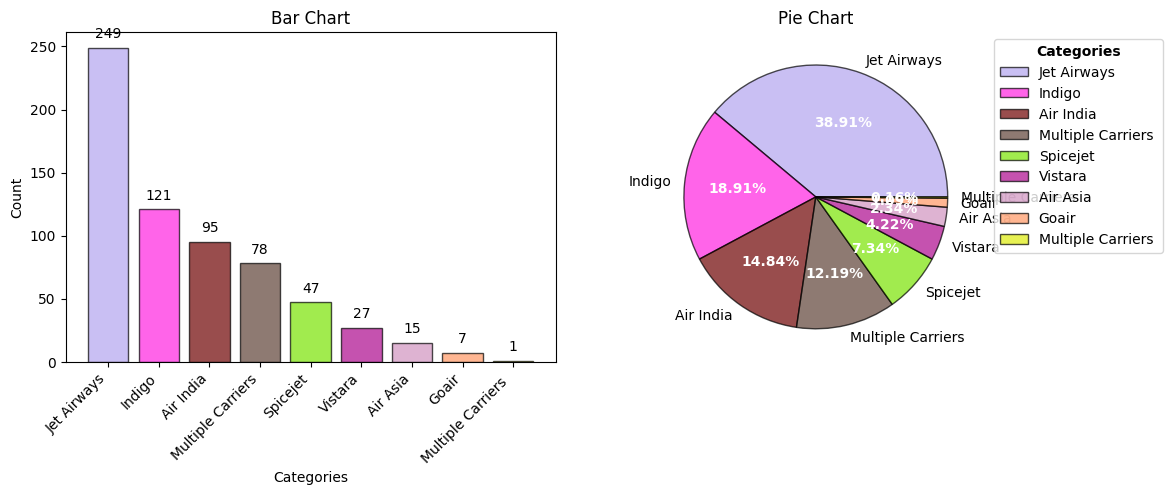

In [35]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud= False)  #k =4 top 4 categories


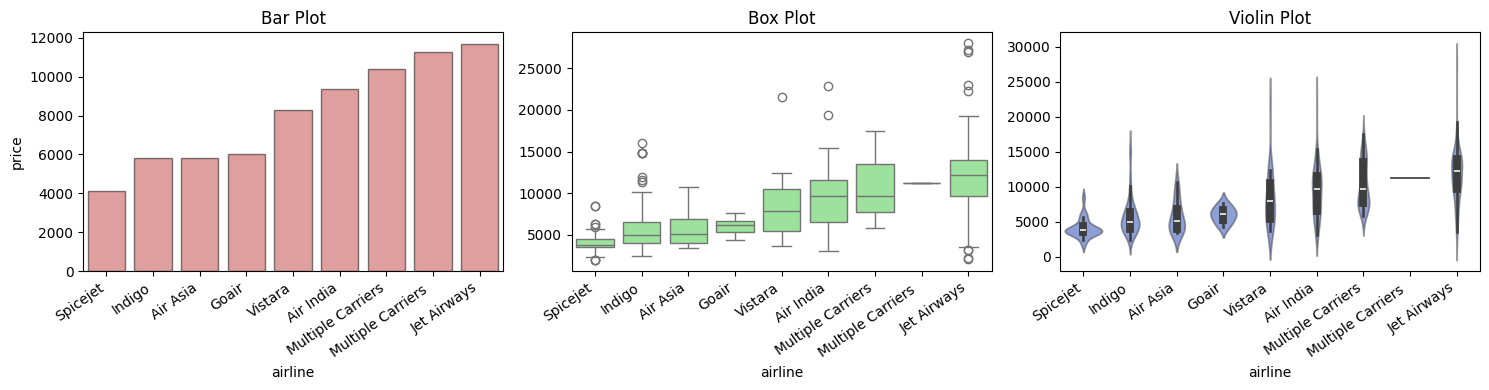

In [36]:
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var= "price",
    cat_var= "airline"
)

In [38]:
eda_helper_functions.num_cat_hyp_testing(train, "price","airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 50.29356340856366
- p-value              : 8.298625797248503e-63
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 279.8441992150749
- p-value              : 7.969961456343323e-56
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- ANOVA  compare means
- Kruskal-wallis compare (Median)

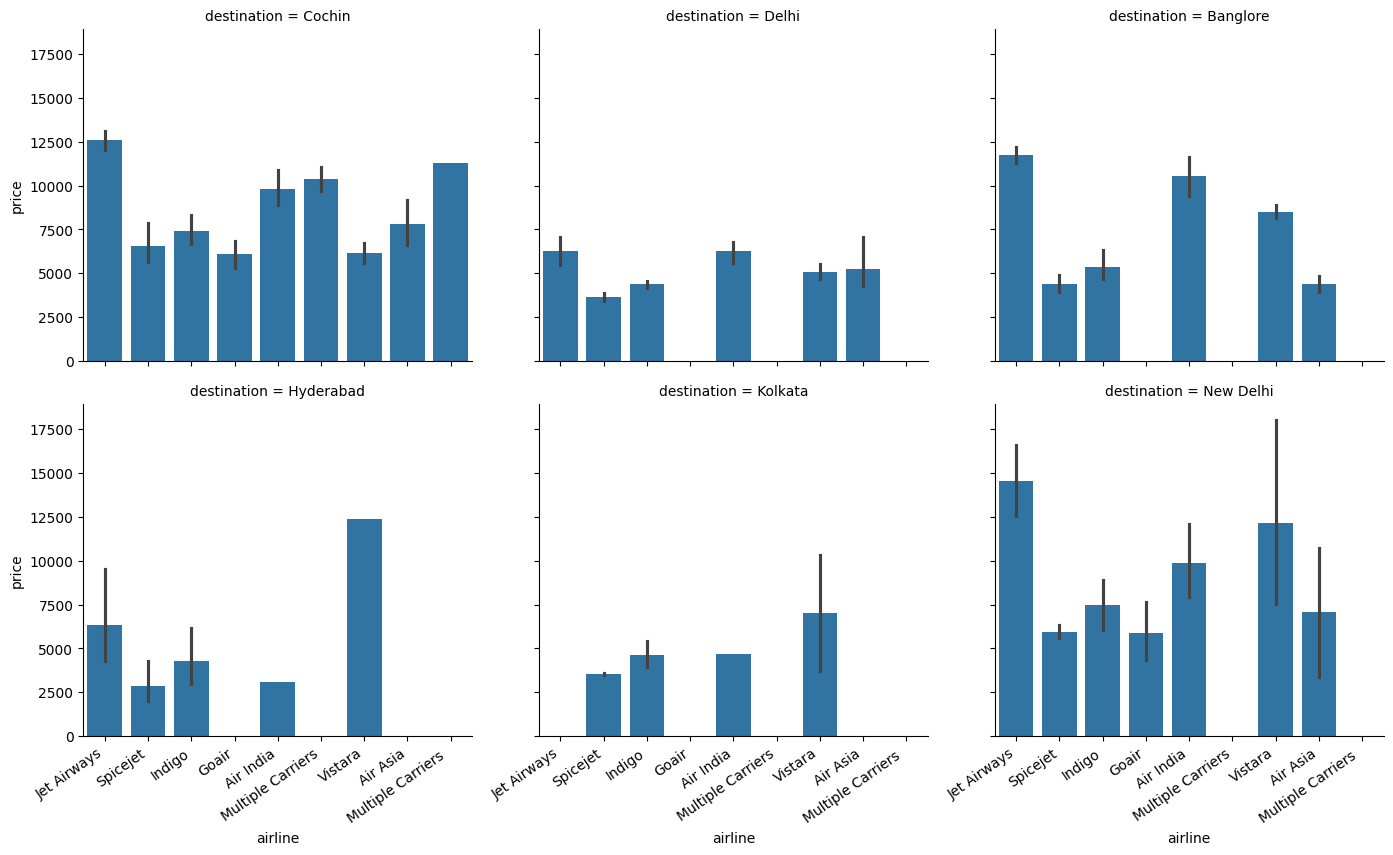

In [47]:
airline_grid = sns.FacetGrid(
    data = train,
    col = "destination",
    col_wrap= 3,
    height=4,
    aspect=1.2,
    sharey = True
    )

airline_grid.map(sns.barplot, "airline","price", order = train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

### 8.2 Date of Journey

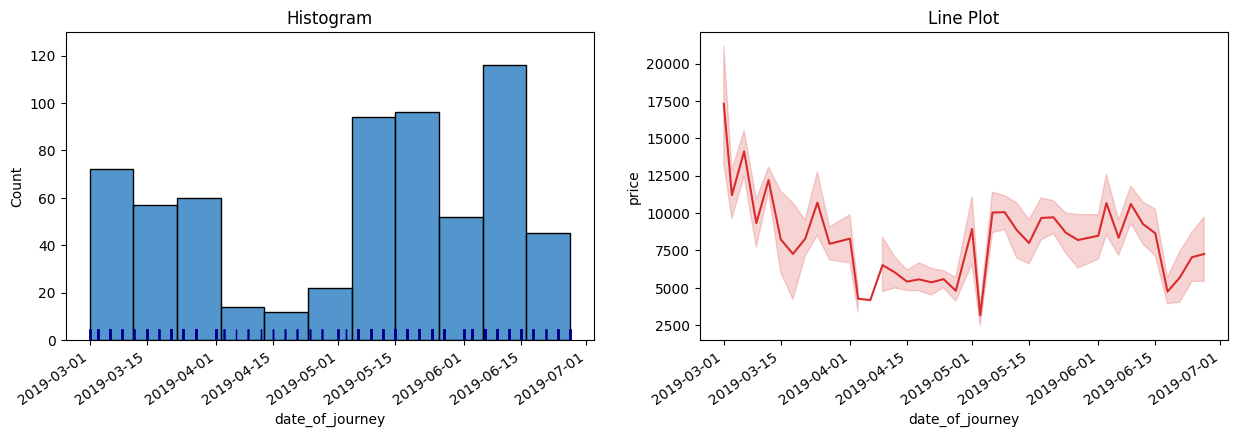

In [48]:
eda_helper_functions.dt_univar_plots(
    data = train, 
    var = "date_of_journey",
    target= "price"
)

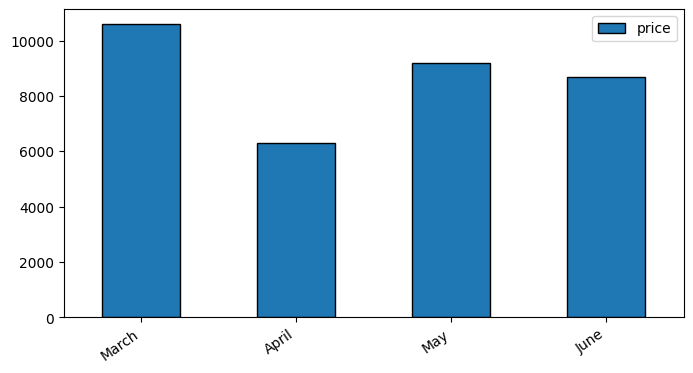

In [61]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey",freq = "M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April" ,"May","June" ], axis= 0)
    .plot(kind= "bar",
        figsize = (8,4),
        edgecolor = "black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

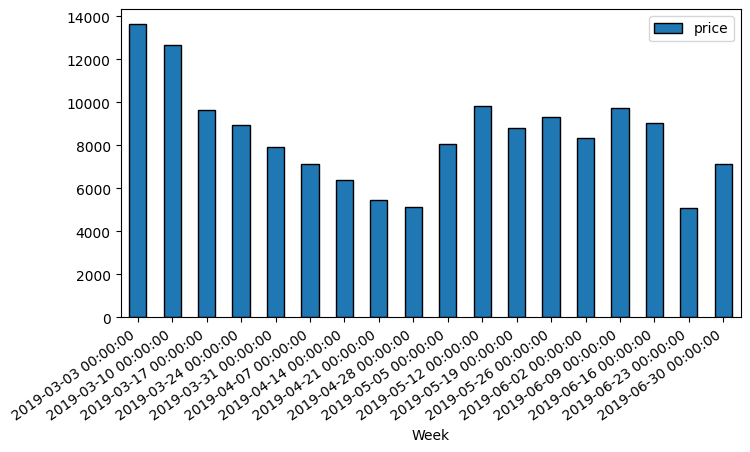

In [67]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey",freq = "W"))
    .price.mean()
    .to_frame()
    .rename_axis(index = "Week")
    .plot(kind= "bar",
        figsize = (8,4),
        edgecolor = "black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

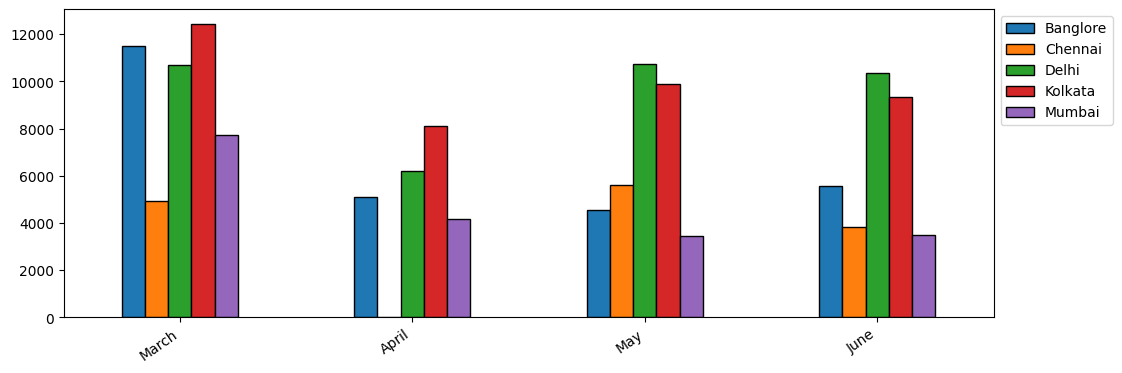

In [74]:
(
    train.groupby([pd.Grouper(key = "date_of_journey", freq = "M"),"source"])
    .price 
    .mean()
    .unstack(fill_value= 0)
    .set_axis(["March", "April" ,"May","June" ], axis= 0)
    .plot(kind= "bar",
        figsize = (12,4),
        edgecolor = "black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)
ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)

#### 8.3 Dept time

In [75]:
train.dep_time

0     2024-05-31 20:55:00
1     2024-05-31 15:15:00
2     2024-05-31 20:25:00
3     2024-05-31 09:35:00
4     2024-05-31 05:55:00
              ...        
635   2024-05-31 13:20:00
636   2024-05-31 09:10:00
637   2024-05-31 14:45:00
638   2024-05-31 02:30:00
639   2024-05-31 07:05:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

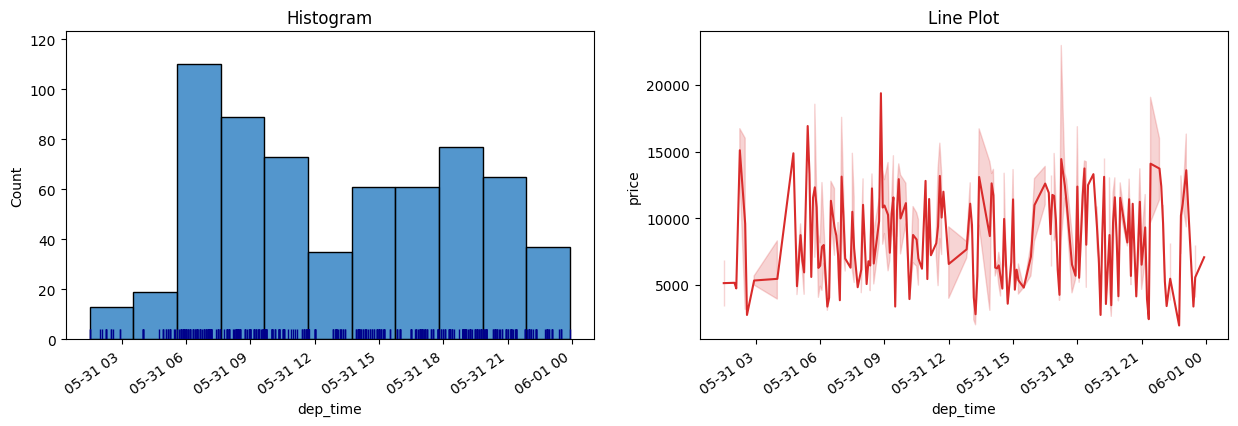

In [76]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

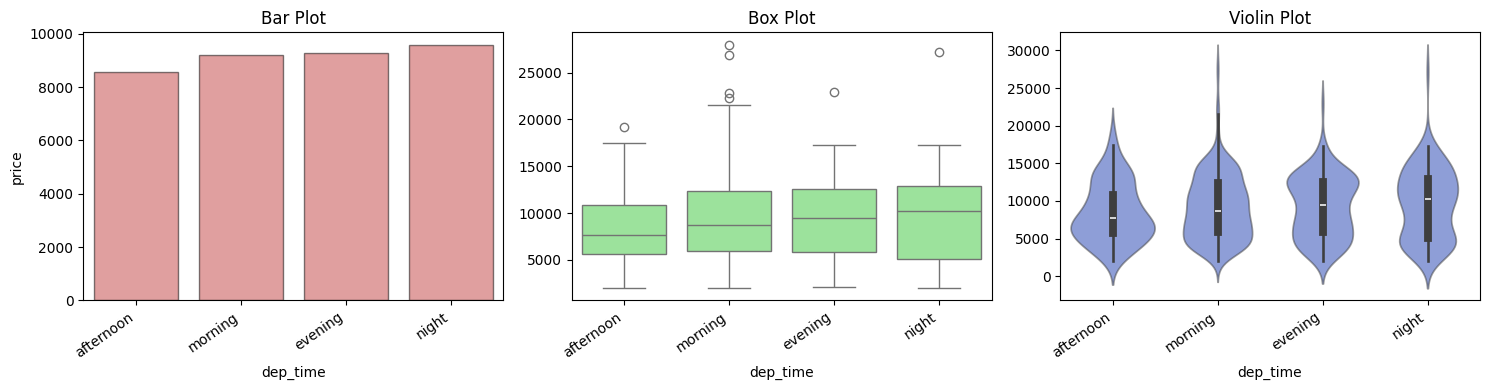

In [79]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)